In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, ReLU
from tensorflow.python.client import device_lib
from tensorflow.keras.models import Sequential
device_lib.list_local_devices()

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
import random
random.random()

0.7539825596789159

In [2]:
np.ones(3)

array([1., 1., 1.])

In [3]:
a = np.zeros((3,4))
a[0,1] = -1
a[2,1] = 1
a


array([[ 0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.]])

In [12]:
np.abs(a).sum(0)

array([0., 2., 0., 0.])

In [14]:
np.abs(a).max(0) * np.abs(a).sum(0)

array([0., 2., 0., 0.])

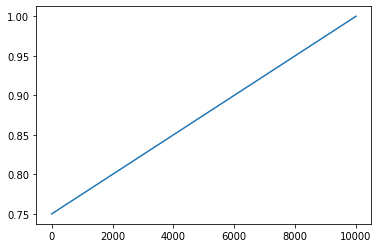

In [3]:
import matplotlib.pyplot as plt

x = np.linspace(0,10000)
y = x*(1-.75)/10000 + .75

plt.plot(x,y)

In [13]:
def to_categorical(a):
    b = np.zeros((n,m,3))
    for i in range(n):
        for j in range(m):
            b[i,j,int(a[i,j])+1] = 1
    return b

to_categorical(a)

array([[[0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]],

       [[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]],

       [[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]],

       [[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]],

       [[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]],

       [[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]]])

In [12]:
from connect_four import PolicyNet
import numpy as np

model = PolicyNet()

In [3]:
model(np.ones((6, 7)))

<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
array([[0.09595956, 0.42626053, 0.11967018, 0.04290091, 0.05935521,
        0.13106719, 0.12478647]], dtype=float32)>

In [34]:
import os

os.path.join('data', 'weights')

'data\\weights'

In [20]:
model.save_weights(os.path.join('data', 'weights.h5'))

In [4]:
model.load_weights(os.path.join('data', 'weights.h5'))

In [20]:
with tf.device("/device:GPU:0"):
    p = model(np.array([to_categorical(a)]), training=True)
    print(p)


tf.Tensor(
[[0.07650969 0.08602038 0.24002844 0.11222097 0.1176293  0.12936227
  0.23822898]], shape=(1, 7), dtype=float32)


In [9]:
import numpy as np
a = np.array([[1,-1, 0, 0], [1, 0, 1, 0]])
np.where(a==0, True, False).max(0)

array([False,  True,  True,  True])

In [9]:
1 in np.array(a)

True

In [24]:
model.layers[-1]

In [21]:
with tf.GradientTape() as g:
    model(np.array([to_categorical(a)]), training=True)
    
g.gradient()

TypeError: gradient() missing 2 required positional arguments: 'target' and 'sources'

In [4]:
import tensorflow_probability as tfp
import tensorflow as tf

p = model(np.ones((6, 7)))

In [9]:
True + True

2

In [10]:
def test(a=None):
    if a is None:
        print('a is none')
    else:
        print('a is set')

test(1)


a is set


In [2]:
import numpy as np

is_random = np.random.random(10) < 1
is_random

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [41]:
is_random[len(is_random)-1-np.argmax(is_random[::-1]):]

array([ True])

In [11]:
a = np.array([
    [-1, 0, 1, 0],
    [1, 1, 0, -1],
    [0, 0, 0, 0]
]).flatten()
a

array([-1,  0,  1,  0,  1,  1,  0, -1,  0,  0,  0,  0])

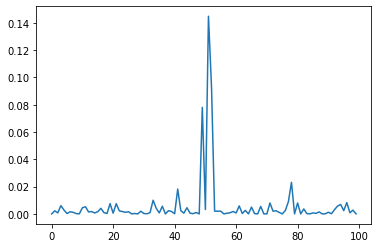

In [5]:
import matplotlib.pyplot as plt

plt.plot(np.load('data/mse.npy'))



In [39]:
a = [1,2,3]
b = [True, False, False]

[(i,j) for i,j in zip(a,b)][:,0]

TypeError: list indices must be integers or slices, not tuple